### Load data

In [12]:
import math
import numpy as np

full_data = np.load('/Users/guencheng/Data Science/Data-Science/Data/CO2_data_full.npy')
# If you are running on Google Colab, change the path to '/content/drive/MyDrive/IB-Data-Science/Data/example_training_data.npy'

print(np.shape(training_data))

(728, 2)


### Scatter plot of all data

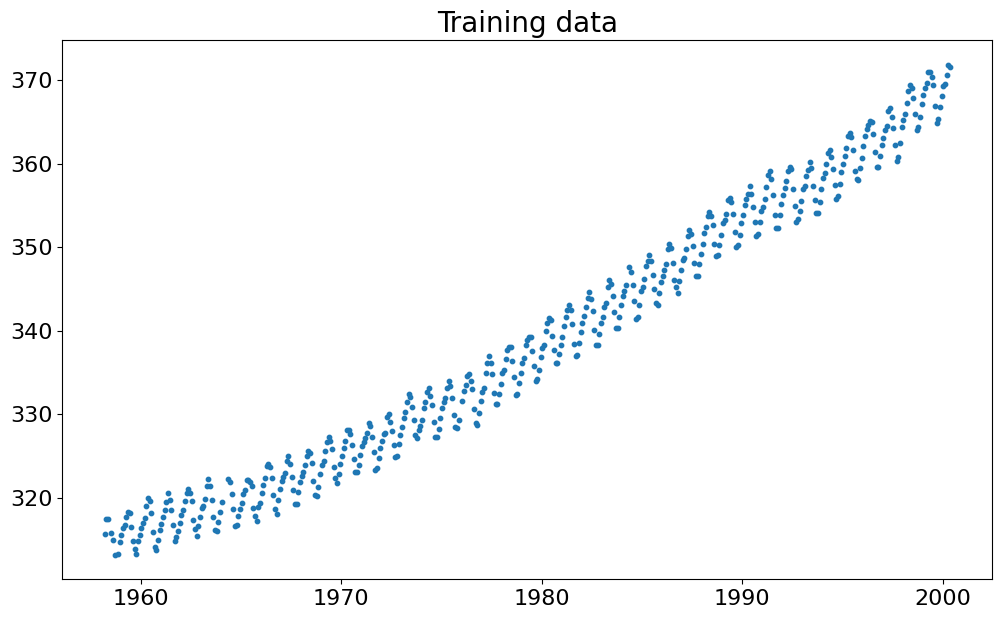

In [13]:
import matplotlib.pyplot as plt

xtrain = full_data[:500,0] #first column has the x-values
ytrain = full_data[:500,1] #second column has the y-values
plt.scatter(xtrain, ytrain,s=10)
plt.title('Training data')
plt.show()
plt.rcParams['figure.figsize'] = [12, 7]
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20

### Use linear model to fit it

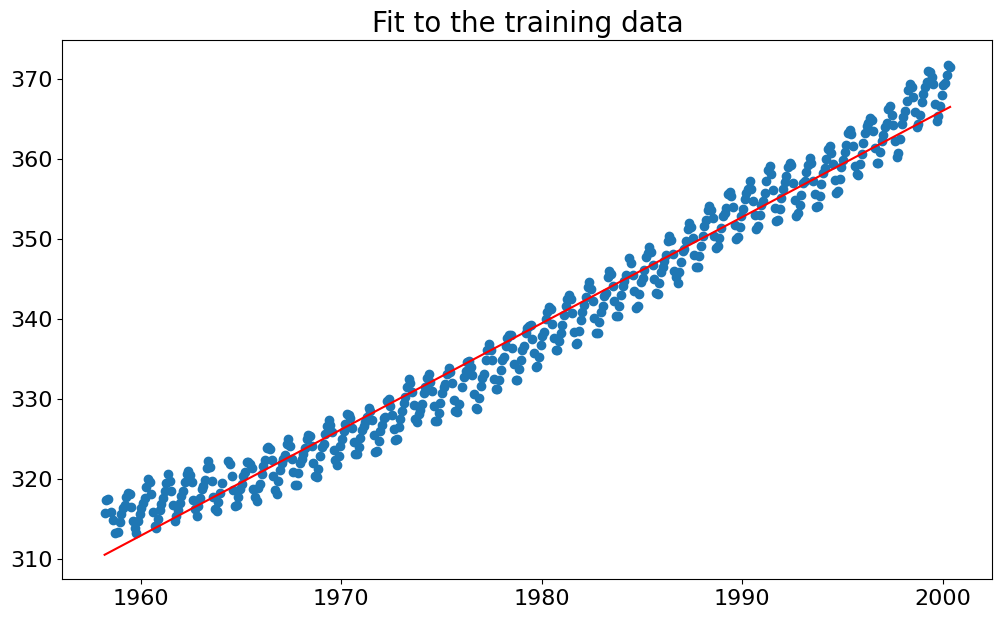

In [14]:
# form the X-transpose matrix and then the X matrix
all_ones = np.ones(np.size(xtrain))
X = np.column_stack((all_ones, xtrain))
XT = X.T

# Compute the least-squares coefficients for the linear model
beta_lin = np.linalg.inv(XT.dot(X)).dot(XT.dot(ytrain))

# Compute the fit of the model
fit_lin = X.dot(beta_lin)

plt.scatter(xtrain, ytrain)
# plot the straight line fit
plt.plot(xtrain, fit_lin, color = 'red')
plt.title('Fit to the training data')
plt.show()

### Calculate MSE

In [15]:
MSE_lin_train = np.linalg.norm(ytrain - fit_lin)**2/(np.size(ytrain))
print('MSE of linear model on training data: ', MSE_lin_train)

MSE of linear model on training data:  7.456111214309883


### Load and scatter plot test data

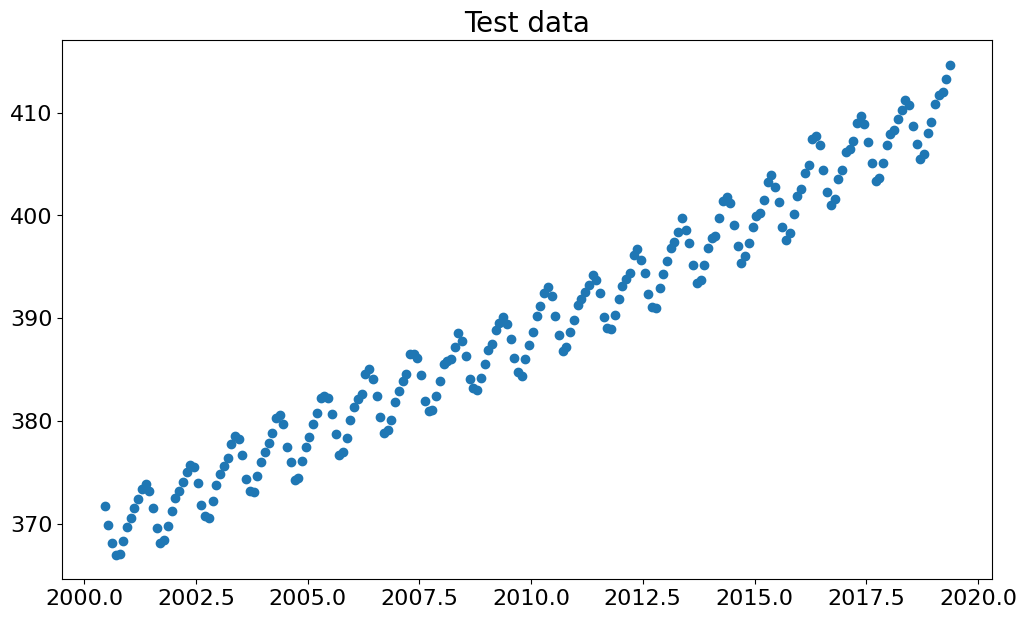

In [16]:
xtest = full_data[500:,0] #first column contains the x-values of the test data
ytest = full_data[500:,1]
plt.scatter(xtest, ytest)
plt.title('Test data')
plt.show()

### See how linear model fits test data

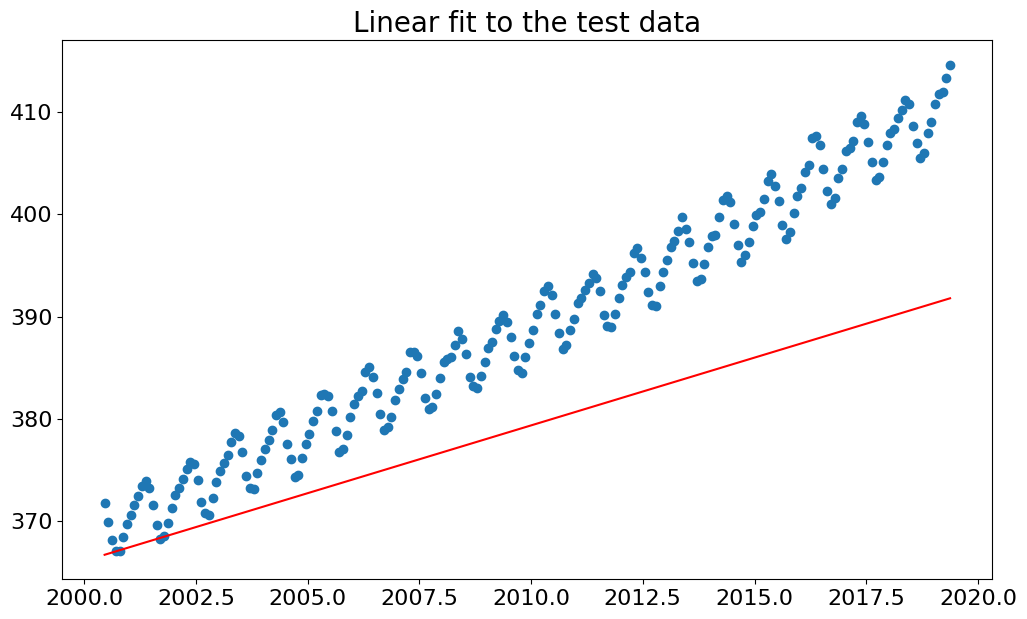

MSE of linear model on test data:  125.94


In [17]:
#Compute the fit of the linear model: \beta_0 + \beta_1 x

test_ones = np.ones(np.shape(xtest))
fit_lin_test = beta_lin[0]*test_ones + beta_lin[1]*xtest

#Plot the fit together with scatter plot of test data
plt.scatter(xtest, ytest)
plt.plot(xtest, fit_lin_test, 'r')
plt.title('Linear fit to the test data')
plt.show()

#Compute MSE on the test data
MSE_lin_test = np.linalg.norm(ytest - fit_lin_test)**2/(np.size(ytest))
print('MSE of linear model on test data: ', np.round(MSE_lin_test, decimals =4))


### Fit a quadratic model

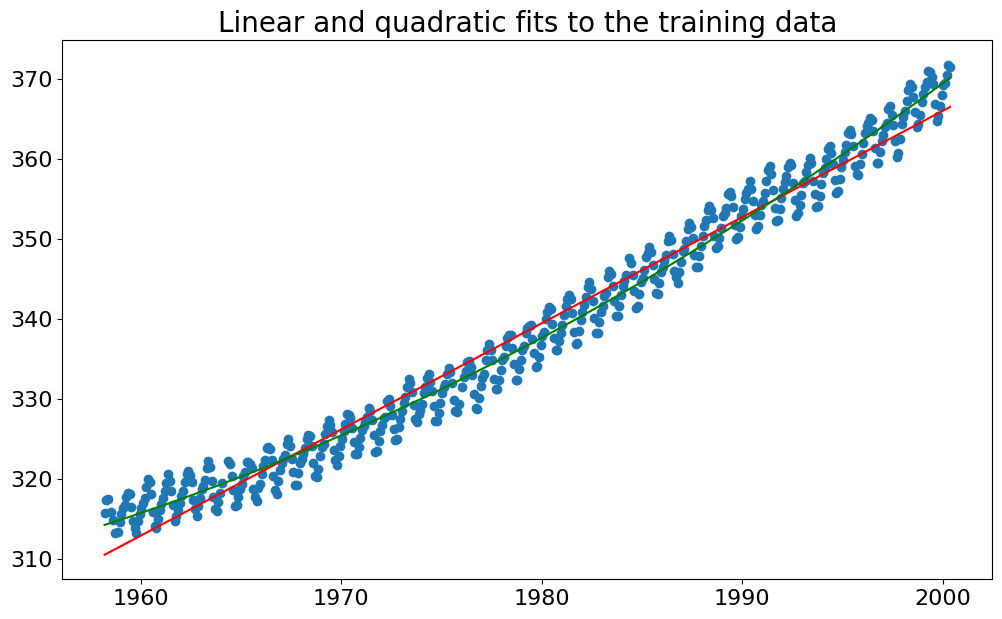

In [18]:
# form the X-transpose matrix and then the X matrix
all_ones = np.ones(np.size(xtrain))
X = np.column_stack((all_ones, xtrain, xtrain**2))
XT = X.T

# Compute the least-squares coefficients for the quadratic model
beta_quad = np.linalg.inv(XT.dot(X)).dot(XT.dot(ytrain))

# Compute the fit of the model
fit_quad = X.dot(beta_quad)

#scatterplot of data
plt.scatter(xtrain, ytrain)

# plot the straight line (red) and the quadratic fit (green)
plt.plot(xtrain, fit_lin, 'r')
plt.plot(xtrain, fit_quad, 'g')
plt.title('Linear and quadratic fits to the training data')
plt.show()

### Calculate MSE

In [19]:
MSE_quad_train = np.linalg.norm(ytrain - fit_quad)**2/(np.size(ytrain))
print('MSE of quadratic model on training data: ', np.round(MSE_quad_train, decimals =4))
print('MSE of linear model on training data: ', np.round(MSE_lin_train, decimals =4))

MSE of quadratic model on training data:  4.7646
MSE of linear model on training data:  7.4561


### See how quadratic model fits test data

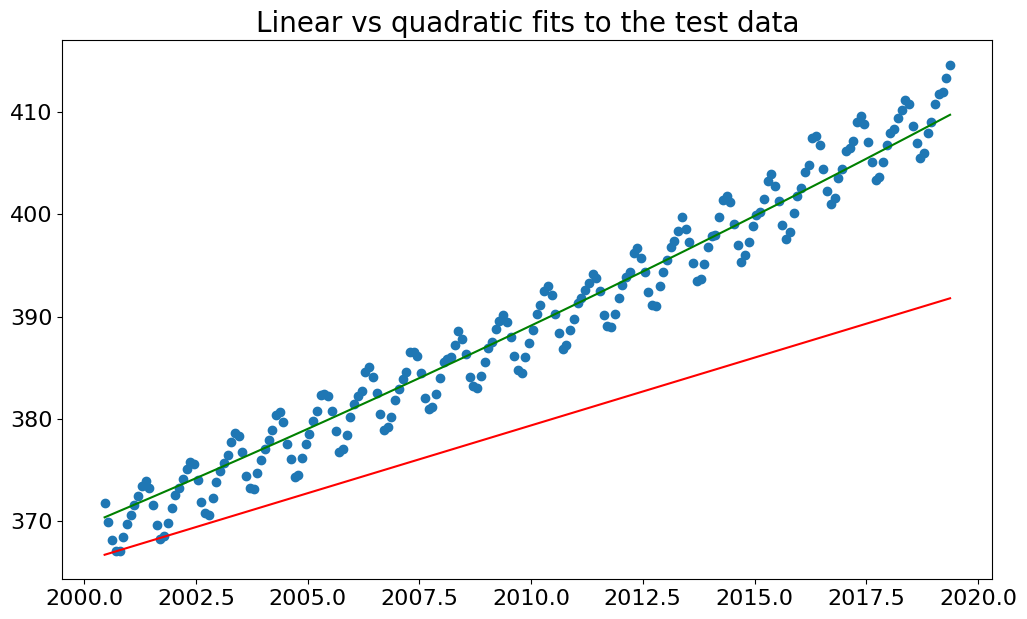

MSE of quadratic model on test data:  5.322
MSE of linear model on test data:  125.94


In [20]:
#Compute the fit of the quadratic model on test data

test_ones = np.ones(np.shape(xtest))
fit_quad_test = beta_quad[0]*test_ones + beta_quad[1]*xtest + beta_quad[2]*(xtest**2)

#Plot the fits together with scatter plot of test data
plt.scatter(xtest, ytest)
plt.plot(xtest, fit_quad_test, 'g')
plt.plot(xtest, fit_lin_test, 'r')
plt.title('Linear vs quadratic fits to the test data')
plt.show()

#Compute MSE on the test data
MSE_quad_test = np.linalg.norm(ytest - fit_quad_test)**2/(np.size(ytest))
print('MSE of quadratic model on test data: ', np.round(MSE_quad_test, decimals =4))
print('MSE of linear model on test data: ', np.round(MSE_lin_test, decimals =4))


### Though MSE of quadratic model on training data is a little bit larger than that of linear model.
### MSE of quadratic on test data is much smaller than that of linear model.
### It means that linear model is just a better fit fot training data and it can not be used to predict further data.
### It is worthing using quadratic model.